In [1]:
import glob
import pandas as pd
import numpy as np
import torch
from google.colab import drive
from sklearn.model_selection import train_test_split
import math
from statistics import mean
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
drive.mount('/content/drive')

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/lung/gene_normal_id.csv')
df

,Unnamed: 0,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,46098b0b-a53e-425a-abc0-73561c447ea1,2.428223,-3.140507,4.262568,1.889084,0.499068,4.875859,4.259340,3.876281,2.043659,...,-9.965784,-4.775960,-5.107803,-9.965784,-9.965784,-9.965784,-9.965784,-4.816037,-3.326263,0
1,028061ef-a99c-42dd-b011-344036e5357f,2.859652,-1.739854,4.444866,1.687105,0.488104,4.576722,5.056237,3.440514,2.177439,...,-9.965784,-9.965784,-4.714065,-9.965784,-9.965784,-9.965784,-9.965784,-5.221623,-3.111539,0
2,5d990ed9-53e4-49c5-aeea-ae2ef30128ec,2.046770,-2.275088,4.317970,1.900529,0.312665,4.969408,5.611408,3.562047,1.530171,...,-9.965784,-7.058894,-5.795859,-4.803897,-9.965784,-7.097888,-9.965784,-4.371833,-4.030325,0
3,a2a050e0-23b8-45ae-888e-010874616996,3.174406,-1.356975,4.367133,2.234256,0.719753,3.863968,4.840509,3.275096,2.558855,...,-9.965784,-6.965784,-3.740818,-3.712173,-9.965784,-9.965784,-9.965784,-4.259806,-2.929061,0
4,2f791c81-1325-4d3d-aa2f-fb07e80a71b3,2.499195,-3.037414,4.125444,1.652372,0.125519,4.729178,4.678371,3.630207,2.050153,...,-9.965784,-9.965784,-3.168771,-9.965784,-9.965784,-5.974829,-9.965784,-3.795859,-3.222970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,4ba11f85-5f18-4db9-af0f-c0da0b78f500,1.931418,-2.155213,4.359352,1.594453,0.812786,4.800677,5.684678,3.738843,1.458382,...,-9.965784,-6.587273,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-6.333516,-3.501443,0
319,538c7894-e20a-4369-a076-fac566779894,3.193188,-1.337521,4.490679,2.168514,0.735522,4.334940,5.000261,3.153676,2.440022,...,-9.965784,-5.345198,-5.526161,-4.532825,-9.965784,-9.965784,-9.965784,-5.886833,-3.756331,0
320,530b32cc-06f7-4a32-bc01-086f9447f9b0,2.604427,-1.190997,4.093864,1.808962,0.153546,4.727479,4.779801,3.209796,1.801779,...,-9.965784,-5.339345,-3.408129,-4.532825,-9.965784,-9.965784,-9.965784,-6.179188,-3.754383,0
321,5d66be2e-e3a3-460d-ac80-0ac8112ba9c6,3.096059,-1.006362,4.701715,2.065366,0.860844,3.330401,5.757645,3.668891,1.732964,...,-9.965784,-9.965784,-5.132894,-9.965784,-9.965784,-9.965784,-9.965784,-5.493297,-2.771027,0


#Tumor

In [ ]:
df_tumor_1 = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor_1_coding.csv')
df_tumor_1

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,3.145254,-9.965784,6.301474,1.506500,2.677914,2.449403,3.445303,5.412324,2.358621,3.361853,...,-9.965784,-7.039785,-1.560217,-9.965784,-9.965784,-9.965784,-9.965784,-6.795859,-3.687800,1
786,2.903231,-9.965784,4.858289,1.243425,0.823586,2.041523,3.680358,4.943753,6.735640,3.864315,...,-9.965784,-6.844769,-4.594225,-9.965784,-9.965784,-9.965784,-9.965784,-5.665661,-1.280335,1
787,3.352674,-9.965784,4.714559,0.845751,0.248535,3.338895,4.015060,4.427633,0.664574,3.323817,...,-9.965784,-9.965784,0.236952,-9.965784,-9.965784,-9.965784,-9.965784,-5.921390,-2.751465,1
788,3.166426,-4.559792,5.055204,1.541862,1.183455,1.795808,1.982583,4.856777,4.251734,3.408236,...,-9.965784,-9.965784,-1.970300,-5.107803,-9.965784,-9.965784,-9.965784,-6.429731,-1.361416,1


In [ ]:
df_tumor_2 = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor_2_coding.csv')
df_tumor_2

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,2.353126,-0.283141,4.345361,2.874482,1.831391,2.604024,3.878627,3.251977,4.392372,4.089091,...,-9.965784,-5.615287,-4.265345,-9.965784,-9.965784,-9.965784,-9.965784,-4.155855,-1.881507,1
1,4.111282,-1.049905,4.319343,2.489414,1.172167,2.391245,4.892877,3.775588,1.486611,4.137667,...,-9.965784,-4.779918,-2.834442,-2.973696,-9.965784,-9.965784,-9.965784,-4.290533,-1.604718,1
2,2.943715,-2.706512,4.457456,2.455728,1.304044,2.468557,4.002162,3.890923,1.172872,3.354339,...,-9.965784,-6.764150,-4.496549,-9.965784,-9.965784,-9.965784,-9.965784,-6.127841,-3.373327,1
3,3.184820,-3.236503,4.534354,1.584289,1.332221,2.747967,4.243677,2.878058,6.511321,3.134550,...,-9.965784,-3.851001,-4.039785,-9.965784,-9.965784,-7.243318,-9.965784,-5.526161,-1.654717,1
4,4.399151,-4.787866,4.936007,1.713256,1.590051,2.649202,2.293076,3.720880,7.084592,3.133580,...,-9.965784,-9.965784,-1.309359,-9.965784,-9.965784,-9.965784,-9.965784,-5.861448,-1.427013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
785,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
786,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
787,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [ ]:
df_tumor = pd.concat([df_tumor_1, df_tumor_2], axis=0, ignore_index=True)
df_tumor

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
1575,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
1576,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
1577,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [ ]:
X = df_tumor.drop('tumor', axis=1)

In [ ]:
X_tumor = X

#Normal

In [ ]:
df_normal = pd.read_csv('/content/drive/MyDrive/lung/lung_normal_coding.csv')
df_normal

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,4.339558,-5.127841,4.542147,1.132050,-1.118414,4.291780,3.587077,3.684662,2.316754,2.736194,...,-9.965784,-7.795859,-3.432844,-3.723563,-9.965784,-9.965784,-9.965784,-6.049308,-3.927963,0
1,2.659377,-1.934566,4.511342,1.998593,0.231924,4.348551,4.722335,3.390255,2.124857,3.329023,...,-9.965784,-5.493297,-4.143054,-9.965784,-9.965784,-9.965784,-9.965784,-4.608232,-2.923578,0
2,2.379344,-5.227016,4.282173,1.180339,-0.991370,4.410660,4.010923,3.905928,1.100843,2.780226,...,-9.965784,-9.965784,-3.685942,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.453241,0
3,2.413377,-2.344465,4.582514,1.694212,0.110898,4.298284,4.774023,3.393567,1.303810,3.102524,...,-9.965784,-7.020926,-3.631288,-4.748554,-9.965784,-9.965784,-9.965784,-5.844769,-4.383831,0
4,2.357214,-3.578629,4.474137,1.192005,-0.742024,4.991272,5.105070,3.827270,1.954382,2.856946,...,-9.965784,-9.965784,-3.585540,-9.965784,-9.965784,-5.293359,-9.965784,-6.493297,-3.283492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.741855,-3.582080,4.487744,2.227464,0.619929,4.408603,3.924242,3.727376,2.603312,3.131096,...,-9.965784,-5.351074,-3.269512,-2.568324,-9.965784,-6.861448,-9.965784,-4.030325,-3.187050,0
418,2.905447,-2.944527,4.775999,2.173863,0.614286,3.906843,5.260786,3.542456,1.790105,3.017726,...,-9.965784,-6.532825,-4.662004,-9.965784,-9.965784,-9.965784,-9.965784,-3.791857,-3.129103,0
419,2.286112,-3.334971,4.482906,1.199625,-0.432844,4.743537,5.973593,4.443898,1.535804,2.917031,...,-9.965784,-6.601212,-0.509225,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-3.519528,0
420,2.502203,-1.708396,4.277464,1.931986,0.525868,4.049622,4.844978,3.213938,1.471708,3.064745,...,-9.965784,-9.965784,-6.200250,-9.965784,-9.965784,-9.965784,-9.965784,-4.643856,-2.888969,0


In [ ]:
X = df_normal.drop('tumor', axis=1)

In [ ]:
X_normal = X

#Build whole dataframe

In [ ]:
df = pd.concat([df_normal, df_tumor_1, df_tumor_2], axis=0, ignore_index=True)
df

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,4.339558,-5.127841,4.542147,1.132050,-1.118414,4.291780,3.587077,3.684662,2.316754,2.736194,...,-9.965784,-7.795859,-3.432844,-3.723563,-9.965784,-9.965784,-9.965784,-6.049308,-3.927963,0
1,2.659377,-1.934566,4.511342,1.998593,0.231924,4.348551,4.722335,3.390255,2.124857,3.329023,...,-9.965784,-5.493297,-4.143054,-9.965784,-9.965784,-9.965784,-9.965784,-4.608232,-2.923578,0
2,2.379344,-5.227016,4.282173,1.180339,-0.991370,4.410660,4.010923,3.905928,1.100843,2.780226,...,-9.965784,-9.965784,-3.685942,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.453241,0
3,2.413377,-2.344465,4.582514,1.694212,0.110898,4.298284,4.774023,3.393567,1.303810,3.102524,...,-9.965784,-7.020926,-3.631288,-4.748554,-9.965784,-9.965784,-9.965784,-5.844769,-4.383831,0
4,2.357214,-3.578629,4.474137,1.192005,-0.742024,4.991272,5.105070,3.827270,1.954382,2.856946,...,-9.965784,-9.965784,-3.585540,-9.965784,-9.965784,-5.293359,-9.965784,-6.493297,-3.283492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
1997,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
1998,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
1999,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [ ]:
#shuffle
df = df.sample(frac=1).reset_index(drop=True)
df

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,2.288299,-2.103457,4.366063,2.063537,0.384934,5.112012,4.711478,3.565195,3.042172,3.101936,...,-9.965784,-6.532825,-3.272297,-4.229721,-9.965784,-6.573467,-9.965784,-4.054093,-2.289122,0
1,4.278721,-9.965784,4.866052,1.036749,0.827087,3.687061,3.715806,5.416424,2.275126,3.564671,...,-9.965784,-9.965784,-2.281386,-3.633076,-9.965784,-9.965784,-9.965784,-6.643856,-1.607793,1
2,2.851339,-2.590745,4.706486,2.426399,1.682079,2.216113,4.329712,3.097071,1.164078,3.634152,...,-9.965784,-4.383831,-3.997694,-4.542879,-9.965784,-9.965784,-9.965784,-4.365871,-2.607353,1
3,3.062916,-9.965784,4.538315,1.402558,0.810566,3.218177,4.125874,3.877656,1.898286,3.133876,...,-9.965784,-9.965784,-0.133527,-9.965784,-9.965784,-9.965784,-9.965784,-6.276485,-2.287008,1
4,2.595886,-3.697125,4.223631,1.896543,1.800372,1.245557,4.065141,3.347864,4.972233,3.545635,...,-9.965784,-6.559792,-1.174947,-9.965784,-9.965784,-9.965784,-9.965784,-5.143054,-3.470729,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2.817828,-5.539520,4.931012,1.973134,1.770449,2.464773,5.827275,4.171743,4.280103,3.019044,...,-9.965784,-5.362900,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-7.097888,-1.790359,1
1997,2.796099,-2.694321,4.414264,3.149341,0.839476,2.065331,4.490384,3.911212,1.448901,3.196182,...,-9.965784,-9.965784,-6.717857,-9.965784,-9.965784,-9.965784,-9.965784,-4.947862,-2.879383,1
1998,2.562645,-9.965784,4.637720,1.056930,-0.111695,4.271493,4.186857,4.068224,1.629520,3.046753,...,-9.965784,-7.179188,-3.417348,-9.965784,-9.965784,-9.965784,-9.965784,-5.820107,-1.799370,1
1999,3.896378,-5.608232,4.437973,1.665302,-0.011733,0.208892,3.500611,3.439437,3.508048,4.042023,...,-9.965784,-9.965784,-2.979373,-9.965784,-9.965784,-9.965784,-9.965784,-5.163591,-3.531156,1


In [ ]:
y = df['tumor']
X = df.drop('tumor', axis=1)

#LOAD LINKS

In [ ]:
links = pd.read_csv('/content/drive/MyDrive/lung/link_index.csv').drop('Unnamed: 0', axis=1)
links

,index1,score,index
0,1,241,0
1,57,186,0
2,75,163,0
3,109,196,0
4,118,248,0
...,...,...,...
13479485,19538,188,19952
13479486,19540,222,19952
13479487,19565,152,19952
13479488,19904,204,19952


In [ ]:
edge_index = torch.tensor([links['index'],links['index1']])
edge_index.shape

torch.Size([2, 13479490])

In [ ]:
edge_index

tensor([[    0,     0,     0,  ..., 19952, 19952, 19952],
        [    1,    57,    75,  ..., 19565, 19904, 19907]])

#KMEANS



In [ ]:
b = pd.read_csv('/content/drive/MyDrive/lung/louvain_complete.csv', sep=',')
b

,node,community
0,0,0
1,1,0
2,57,1
3,75,2
4,109,0
...,...,...
19197,18047,5
19198,19816,1
19199,17466,0
19200,17959,0


In [ ]:
x_normal = X_normal.transpose()
x_normal['node'] = [i for i in range(X_normal.shape[1])]
x_normal

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,node
ENSG00000000003.15,4.339558,2.659377,2.379344,2.413377,2.357214,2.788414,2.546215,2.788519,2.782975,2.993221,...,2.410043,2.505688,2.072483,2.073957,2.741855,2.905447,2.286112,2.502203,2.204704,0
ENSG00000000005.6,-5.127841,-1.934566,-5.227016,-2.344465,-3.578629,-1.655172,-1.902929,-2.779918,-3.031504,-0.926865,...,-3.459576,-2.498994,-4.023270,-5.194955,-3.582080,-2.944527,-3.334971,-1.708396,-3.110293,1
ENSG00000000419.13,4.542147,4.511342,4.282173,4.582514,4.474137,4.006917,4.312868,4.665722,4.256611,4.495785,...,4.728405,4.475623,4.080112,4.359367,4.487744,4.775999,4.482906,4.277464,4.384478,2
ENSG00000000457.14,1.132050,1.998593,1.180339,1.694212,1.192005,2.005580,2.174566,1.888811,0.815411,1.862154,...,1.635987,1.515460,2.322822,0.219215,2.227464,2.173863,1.199625,1.931986,2.185708,3
ENSG00000000460.17,-1.118414,0.231924,-0.991370,0.110898,-0.742024,0.311387,0.667120,0.526970,-0.979942,0.366924,...,-0.072938,0.115300,0.795434,-1.186722,0.619929,0.614286,-0.432844,0.525868,0.534261,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288661.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19957
ENSG00000288669.1,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-6.748554,-6.930160,-6.878321,-9.965784,-6.861448,-9.965784,-9.965784,-9.965784,-9.965784,19958
ENSG00000288671.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19959
ENSG00000288674.1,-6.049308,-4.608232,-9.965784,-5.844769,-6.493297,-4.853084,-3.880445,-4.680382,-4.710284,-4.095420,...,-4.684086,-4.351074,-4.221623,-6.254289,-4.030325,-3.791857,-5.293359,-4.643856,-5.748554,19960


In [ ]:
x_tumor = X_tumor.transpose()
x_tumor['node'] = [i for i in range(X_tumor.shape[1])]
x_tumor

,0,1,2,3,4,5,6,7,8,9,...,1570,1571,1572,1573,1574,1575,1576,1577,1578,node
ENSG00000000003.15,3.486740,3.563549,3.414636,4.024515,4.169003,4.474890,3.841430,3.782503,4.544479,5.465037,...,3.997636,3.122341,3.150738,3.770597,2.827352,4.919159,3.948292,2.632873,3.127155,0
ENSG00000000005.6,-9.965784,-9.965784,-9.965784,-3.910502,-1.840629,-5.287712,-2.142417,-9.965784,-6.748554,-3.945638,...,-4.536168,-9.965784,-1.857260,-2.173319,-5.828281,-9.965784,-6.546245,-6.615287,-9.965784,1
ENSG00000000419.13,5.172844,5.505129,4.876036,4.125254,4.531756,5.085820,4.541434,4.415468,4.994652,5.753048,...,4.802736,5.170674,4.460494,4.490936,5.458950,4.806401,3.840856,4.549663,4.916997,2
ENSG00000000457.14,1.602267,0.720629,0.443076,1.106549,2.968423,1.823505,1.943509,1.143785,1.603264,0.981633,...,1.247502,1.433974,2.390998,2.278788,1.390503,2.202700,2.528996,0.432425,1.650581,3
ENSG00000000460.17,2.895497,1.305737,0.660746,-0.166341,2.185549,0.072037,0.863146,-0.531782,1.125783,1.988157,...,0.612494,1.109494,2.036152,1.112433,0.803310,1.007985,0.847356,0.505078,1.350158,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288661.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19957
ENSG00000288669.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-5.710284,-6.828281,-9.965784,-7.137965,-9.965784,-9.965784,-7.002310,-9.965784,19958
ENSG00000288671.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19959
ENSG00000288674.1,-8.532825,-5.869860,-8.333516,-7.861448,-4.832385,-6.345198,-4.811979,-4.891108,-5.553003,-6.088040,...,-7.058894,-5.965784,-4.768076,-5.339345,-5.733124,-6.058894,-5.853084,-8.702750,-7.058894,19960


In [ ]:
join_normal = b.set_index('node').join(x_normal.set_index('node'), how='inner')
join_normal

,community,0,1,2,3,4,5,6,7,8,...,412,413,414,415,416,417,418,419,420,421
node,,,,,,,,,,,,,,,,,,,,,
0,0,4.339558,2.659377,2.379344,2.413377,2.357214,2.788414,2.546215,2.788519,2.782975,...,2.771167,2.410043,2.505688,2.072483,2.073957,2.741855,2.905447,2.286112,2.502203,2.204704
1,0,-5.127841,-1.934566,-5.227016,-2.344465,-3.578629,-1.655172,-1.902929,-2.779918,-3.031504,...,-1.306145,-3.459576,-2.498994,-4.023270,-5.194955,-3.582080,-2.944527,-3.334971,-1.708396,-3.110293
57,1,2.574828,-1.213571,3.086597,-1.224317,3.467071,1.074574,-0.419855,-2.354759,3.179623,...,-1.850480,1.195096,0.757621,0.189287,2.867560,0.445197,-1.328073,2.324580,-0.712646,-1.856737
75,2,6.478330,6.201934,6.875544,6.074426,6.814782,5.485649,5.972906,6.053863,7.141119,...,5.954441,6.040954,6.124740,5.928666,7.667609,6.210724,6.052407,6.965872,6.015078,5.804529
109,0,5.714921,5.038182,5.862615,4.683084,5.608381,5.293047,4.674382,4.653908,6.152252,...,4.695988,4.862317,4.781612,5.063796,5.376245,4.895395,4.495964,5.328158,4.963853,4.695560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18047,5,-7.265345,-6.380822,-9.965784,-9.965784,-9.965784,-9.965784,-6.030325,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
19816,1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
17466,0,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784


In [ ]:
join_tumor = b.set_index('node').join(x_tumor.set_index('node'), how='inner')
join_tumor

,community,0,1,2,3,4,5,6,7,8,...,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578
node,,,,,,,,,,,,,,,,,,,,,
0,0,3.486740,3.563549,3.414636,4.024515,4.169003,4.474890,3.841430,3.782503,4.544479,...,3.236952,3.997636,3.122341,3.150738,3.770597,2.827352,4.919159,3.948292,2.632873,3.127155
1,0,-9.965784,-9.965784,-9.965784,-3.910502,-1.840629,-5.287712,-2.142417,-9.965784,-6.748554,...,-2.362158,-4.536168,-9.965784,-1.857260,-2.173319,-5.828281,-9.965784,-6.546245,-6.615287,-9.965784
57,1,-0.611535,-1.731206,-5.339345,1.496616,-2.965784,1.156655,-3.472329,1.170630,1.148414,...,-5.828281,2.407026,-3.239226,-9.965784,-1.473530,0.668028,-4.389867,-2.210897,-2.729292,-3.768076
75,2,8.415786,8.180495,9.271039,7.591575,6.717553,8.086438,8.260414,8.010731,7.489866,...,6.678218,6.530667,6.970003,7.581704,6.633289,7.573612,7.152034,7.837487,7.926827,7.911908
109,0,3.004088,5.598246,5.122283,4.773490,3.762540,5.381363,6.247119,5.759377,5.951196,...,4.889795,5.287742,6.257699,2.789458,4.558476,4.808606,2.512480,4.687559,7.467254,3.485865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18047,5,-5.580353,-9.965784,-5.287712,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-9.965784,...,-6.321928,-9.965784,-9.965784,-4.695255,-9.965784,-9.965784,-9.965784,-7.221623,-9.965784,-5.820107
19816,1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
17466,0,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784


In [ ]:
means_normal = join_normal.drop('community', axis=1).transpose().median(axis=0)
means_tumor = join_tumor.drop('community', axis=1).transpose().median(axis=0)
data = []
for i in range(means_normal.shape[0]):
  data.append([float(means_normal.iloc[i]), float(means_tumor.iloc[i])])
data = np.array(data)
print(data.shape)

(19202, 2)


In [ ]:
cl = join_normal['community'].values
cl = [i for i in cl]
len(cl)

19202

In [ ]:
len(set(cl))

6

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


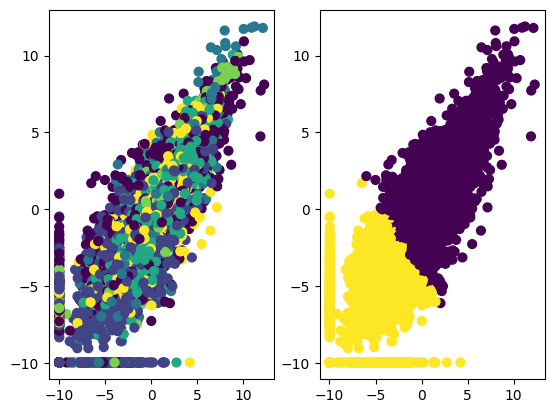

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# visualize the dataset
_, ax = plt.subplots(1, 2)
ax[0].scatter(data[:, 0], data[:, 1], c=cl, s=40)
# plt.waitforbuttonpress()

# run spectral clustering - tune n_cl and sigma!!!
sigma = 0.09
n_cl = len(set(cl))

labels = KMeans(n_clusters=2).fit_predict(data)

# visualize results
ax[1].scatter(data[:, 0], data[:, 1], c=labels, s=40)
plt.show()
#plt.savefig('kmeans_both_median.png')

In [ ]:
# Calculate distances to the main diagonal
distances = np.abs(data[:, 0] - data[:, 1])

# Sort distances in descending order
sorted_indices = np.argsort(distances)[::-1]

# Select the top 100 points
top_100_points = data[sorted_indices[:100]]

#NETWORK

In [ ]:
most_expressed = pd.read_csv('/content/drive/MyDrive/lung/most_expressed.csv')
most_expressed = most_expressed.loc[:, 'gene_name'].values
most_expressed

array(['ENSG00000169469.9', 'ENSG00000170373.8', 'ENSG00000168530.16',
       ..., 'ENSG00000135318.12', 'ENSG00000203722.8',
       'ENSG00000105193.9'], dtype=object)

In [ ]:
least_expressed = pd.read_csv('/content/drive/MyDrive/lung/least_expressed.csv')
least_expressed = least_expressed.loc[:, 'gene_name'].values
least_expressed

array(['ENSG00000197497.11', 'ENSG00000196735.13', 'ENSG00000106633.17',
       ..., 'ENSG00000283952.1', 'ENSG00000256453.2', 'ENSG00000204918.3'],
      dtype=object)

In [ ]:
X.columns

Index(['ENSG00000000003.15', 'ENSG00000000005.6', 'ENSG00000000419.13',
       'ENSG00000000457.14', 'ENSG00000000460.17', 'ENSG00000000938.13',
       'ENSG00000000971.16', 'ENSG00000001036.14', 'ENSG00000001084.13',
       'ENSG00000001167.14',
       ...
       'ENSG00000288649.1', 'ENSG00000288654.1', 'ENSG00000288656.1',
       'ENSG00000288658.1', 'ENSG00000288660.1', 'ENSG00000288661.1',
       'ENSG00000288669.1', 'ENSG00000288671.1', 'ENSG00000288674.1',
       'ENSG00000288675.1'],
      dtype='object', length=19962)

In [ ]:
cols = [x for x in X.columns if x not in most_expressed[:3900] and x not in least_expressed[-3900:]]
genes = np.append(most_expressed[:3900], least_expressed[-3900:])
genes = np.append(genes, cols[100:154])
#genes = set(genes)
print(len(genes))
X = X.loc[:, genes]
X

7854


,ENSG00000169469.9,ENSG00000170373.8,ENSG00000168530.16,ENSG00000274618.2,ENSG00000168484.12,ENSG00000169474.4,ENSG00000186832.9,ENSG00000185686.18,ENSG00000205420.11,ENSG00000163209.15,...,ENSG00000008283.16,ENSG00000008294.21,ENSG00000008300.17,ENSG00000008311.15,ENSG00000008323.15,ENSG00000008324.12,ENSG00000008382.16,ENSG00000008394.13,ENSG00000008405.12,ENSG00000008441.18
0,-9.965784,-1.758770,-9.965784,-4.848921,8.936421,-9.965784,-2.422752,1.096936,-4.553003,-6.587273,...,5.068632,3.913636,0.612966,0.366252,0.658097,1.997726,2.398350,5.267798,1.337996,3.016193
1,-0.274564,-2.527824,-9.965784,-2.728335,13.477089,-2.160363,1.456280,-2.391380,2.116664,-2.766112,...,4.096810,3.338210,-2.196938,2.934177,-0.226172,2.269632,2.560544,4.930023,2.707746,4.770528
2,8.607488,4.050197,-5.454822,2.271426,0.722728,9.577406,7.600248,0.666757,10.022656,7.647953,...,3.203937,4.253203,-1.088347,3.572004,1.738811,1.041243,2.406673,2.503247,2.336769,2.365972
3,9.900027,4.042417,-9.965784,-3.731206,0.829850,7.948164,10.006732,1.097004,10.576523,3.385044,...,4.141727,3.020911,-0.586406,1.927138,2.070149,2.458907,2.087089,3.013802,2.549447,3.028251
4,4.874285,1.233090,-9.965784,-9.965784,-1.701811,0.668391,0.220082,3.765906,2.093425,-2.450873,...,4.657286,3.825501,2.355749,0.611267,3.392867,1.813894,1.698263,5.498078,1.608857,1.696261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,-9.965784,3.528421,-9.965784,-9.965784,11.559350,-9.965784,-3.478748,-6.179188,-9.965784,-9.965784,...,4.491725,4.444800,-1.991943,2.897395,-0.411387,1.467645,2.629100,3.855033,1.226385,4.960062
1997,-9.965784,1.600936,-9.965784,-9.965784,6.637507,-9.965784,-3.088040,-0.909689,-2.035047,-5.930160,...,5.369365,3.228526,1.139993,1.584289,2.844687,2.115666,3.453386,5.941935,1.993928,4.208837
1998,-9.965784,-1.697593,2.780478,3.790876,11.116899,-9.965784,-9.965784,-6.493297,-4.636661,-9.965784,...,3.205205,5.483606,-2.066730,4.383566,0.678342,1.466236,1.039700,2.957562,3.852808,2.987248
1999,4.898576,5.185129,-5.467533,4.323968,-0.340258,5.382200,8.683685,2.430981,9.254919,4.704977,...,3.424936,4.224411,-1.716434,3.020627,3.475656,1.478972,1.618051,3.945486,1.688136,3.120534


In [ ]:
#X = X.iloc[:, sorted_indices[:1024]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print("TRAIN shape: ", X_train.shape)
print("TRAIN labels shape: ", y_train.shape)
print("Number of classes: ", len(y_train.unique()))

TRAIN shape:  (1600, 7854)
TRAIN labels shape:  (1600,)
Number of classes:  2


In [ ]:
"""from sklearn.decomposition import PCA

pca = PCA(n_components=1024)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print("PCA TRAIN shape: ", X_train.shape)
print("PCA TEST shape: ", X_test.shape)"""

'from sklearn.decomposition import PCA\n\npca = PCA(n_components=1024)\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\nprint("PCA TRAIN shape: ", X_train.shape)\nprint("PCA TEST shape: ", X_test.shape)'

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch.utils.data import DataLoader
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class GCNEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, edge_index, n_classes):
        self.edge_index = edge_index
        self.n_classes = n_classes
        self.model = None

    def fit(self, X, y, **kwargs):
        # Initialize the GCN model
        self.model = GCN(self.edge_index, features_in=X.shape[1], n_classes=self.n_classes)

        # Convert X and y to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)

        # Define the loss function and optimizer
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)

        # Train the model
        for epoch in range(kwargs.get('epochs', 250)):
            self.model.train()
            optimizer.zero_grad()
            out = self.model(X_tensor, self.edge_index)
            loss = criterion(out, y_tensor)
            loss.backward()
            optimizer.step()
            if epoch % 10 == 0:
              print("EPOCH {}: LOSS: {}".format(epoch, loss))

    def predict(self, X):
        # Convert X to a PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Make predictions
        self.model.eval()
        with torch.no_grad():
            out = self.model(X_tensor, self.edge_index)
            _, predicted = torch.max(out, 1)

        return predicted.numpy()

    def score(self, X, y):
        # Make predictions
        y_pred = self.predict(X)

        # Calculate accuracy
        return accuracy_score(y, y_pred)

    def set_index(self, edge_index):
      self.edge_index = edge_index

# Define your GCN model class
class GCN(torch.nn.Module):
    def __init__(self, edge_index, features_in, n_classes):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(features_in, 512)
        self.conv2 = GCNConv(512, 256)
        self.conv3 = GCNConv(256, 2)
        self.classifier = Linear(2, n_classes)
        self.edge_index = edge_index

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()

        out = self.classifier(h)

        return out


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

features_in = X_train.shape[1]
n_classes = len(y_train.unique())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(features_in, 512)
        self.conv2 = GCNConv(512, 256)
        self.conv3 = GCNConv(256, 2)
        self.classifier = Linear(2, n_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()

        out = self.classifier(h)

        return out

model = GCN().double().to(device)
print(model)

GCN(
  (conv1): GCNConv(7854, 512)
  (conv2): GCNConv(512, 256)
  (conv3): GCNConv(256, 2)
  (classifier): Linear(in_features=2, out_features=2, bias=True)
)


In [ ]:
#BUILD CORRELATION MATRIXES
correlation_matrix_train = np.corrcoef(X_train)
correlation_matrix_test = np.corrcoef(X_test)
print("CORR_MATRIX TRAIN shape: ", correlation_matrix_train.shape)
print("CORR_MATRIX TEST shape: ", correlation_matrix_test.shape)

CORR_MATRIX TRAIN shape:  (1600, 1600)
CORR_MATRIX TEST shape:  (401, 401)


In [ ]:
#CONVERT ALL TO TENSORS
x_train = torch.from_numpy(X_train.values)
y_train = torch.from_numpy(y_train.values)
x_test = torch.from_numpy(X_test.values)
y_test = torch.from_numpy(y_test.values)
#correlation_matrix_train = torch.from_numpy(correlation_matrix_train)
#correlation_matrix_test = torch.from_numpy(correlation_matrix_test)

In [ ]:
threshold_edge = 0.95 #threshold to determine if two nodes are connected based on the correlation matrix

In [ ]:
#BUILD EDGE INDEX FOR TRAIN SET
mask = correlation_matrix_train > threshold_edge

#Exclude the diagonal elements (assuming the matrix is square)
np.fill_diagonal(mask, False)

#Get the row and column indices where the mask is True
row_indices, col_indices = np.where(mask)

#Create the edge_index tensor
edge_index_train = torch.tensor([row_indices, col_indices], dtype=torch.int64)

print(edge_index_train.shape)

torch.Size([2, 21646])


In [ ]:
#BUILD EDGE INDEX FOR TEST SET
mask = correlation_matrix_test > threshold_edge

#Exclude the diagonal elements (assuming the matrix is square)
np.fill_diagonal(mask, False)

#Get the row and column indices where the mask is True
row_indices, col_indices = np.where(mask)

#Create the edge_index tensor
edge_index_test = torch.tensor([row_indices, col_indices], dtype=torch.int64)

print(edge_index_test.shape)

torch.Size([2, 830])


In [ ]:
x_train = x_train.double().to(device)
edge_index_train = edge_index_train.to(device)
y_train = y_train.to(device)
x_test = x_test.double().to(device)
edge_index_test = edge_index_test.to(device)
y_test = y_test.to(device)

In [ ]:
#TRAIN SETTINGS
import torch.optim as optim
import torch.nn as nn

#estimator = GCNEstimator(edge_index=edge_index_train, n_classes=2)
#estimator.fit(x_train, y_train)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 250

In [ ]:
import numpy as np

#TRAIN LOOP
for epoch in range(n_epochs):
    optimizer.zero_grad()
    out = model(x_train.double(), edge_index_train)
    loss = loss_fn(out, y_train)
    # backward pass
    loss.backward()
    if epoch % 10 == 0:
      print(f"EPOCH {epoch}, LOSS: {loss}")
    # update weights
    optimizer.step()

EPOCH 0, LOSS: 0.7557704358920568
EPOCH 10, LOSS: 0.5464919045350554
EPOCH 20, LOSS: 0.48546077408621147
EPOCH 30, LOSS: 0.45171459599450464
EPOCH 40, LOSS: 0.43117109713416335
EPOCH 50, LOSS: 0.4163659429468147
EPOCH 60, LOSS: 0.4046120524055848
EPOCH 70, LOSS: 0.394387962178589
EPOCH 80, LOSS: 0.38521831686944685
EPOCH 90, LOSS: 0.37681972262518626
EPOCH 100, LOSS: 0.3690579166904974
EPOCH 110, LOSS: 0.36183310931684043
EPOCH 120, LOSS: 0.35507200856528565
EPOCH 130, LOSS: 0.34871054271694374
EPOCH 140, LOSS: 0.342695282273542
EPOCH 150, LOSS: 0.33697748958540985
EPOCH 160, LOSS: 0.3315083768272293
EPOCH 170, LOSS: 0.32621279645327284
EPOCH 180, LOSS: 0.3204966023297993
EPOCH 190, LOSS: 0.366889132876665
EPOCH 200, LOSS: 0.1969766216337272
EPOCH 210, LOSS: 0.178641144983469
EPOCH 220, LOSS: 0.16806972271592385
EPOCH 230, LOSS: 0.15954609387211435
EPOCH 240, LOSS: 0.1522700398757032


In [ ]:
#TEST
model.eval()
out = model(x_test, edge_index_test)
pred = out.argmax(dim=1)  #Use the class with highest probability.
print(pred)
print(y_test)
test_correct = pred == y_test
test_acc = int(test_correct.sum()) / len(test_correct)
print("Accuracy on test set: {}".format(test_acc))

tensor([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/BioInfo/model_weights_most_least_expressed_7854.pth')

In [ ]:
#estimator.set_index(edge_index_test)
#pred = estimator.predict(x_test)

<ipython-input-45-786b2c5b64b6>:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)


In [ ]:
#pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [ ]:
test_correct = pred == y_test.numpy()
test_acc = int(test_correct.sum()) / len(test_correct)
print("Accuracy on test set: {}".format(test_acc))

AttributeError: 'bool' object has no attribute 'sum'

In [ ]:
from sklearn.inspection import permutation_importance

# Assuming model is your trained GNN model and X_test contains your test data (gene expression values)
perm_importance = permutation_importance(estimator, x_test, y_test, n_repeats=4, random_state=42)

# Extract feature importance scores
gene_importance_scores = perm_importance.importances_mean

# Rank genes by importance scores
sorted_indices = gene_importance_scores.argsort()[::-1]

# Select the most significant gene
most_significant_gene_index = sorted_indices[0]
most_significant_gene = X_test.columns[most_significant_gene_index]

print(f"The most significant gene is: {most_significant_gene}")


The most significant gene is: ENSG00000105193.9


In [ ]:
genes = [i for i in X_test.columns[sorted_indices[:1024]] if i in most_expressed[:1024]]
len(genes)

0

#Evaluating biomarkers tumor

In [ ]:
sorted_indices

array([ 2310, 13609, 18604, ...,  9986, 17240, 19201])

In [ ]:
top_100_points

array([[ 4.20809862e+00, -9.96578428e+00],
       [ 2.75333514e+00, -9.96578428e+00],
       [ 1.50245327e+00, -9.96578428e+00],
       [ 1.33366566e+00, -9.96578428e+00],
       [ 1.27072547e+00, -9.96578428e+00],
       [-9.96578428e+00,  1.00927550e+00],
       [ 2.08572489e-01, -9.96578428e+00],
       [-8.82739805e-03, -9.96578428e+00],
       [-1.09204149e-01, -9.96578428e+00],
       [-4.49001268e-01, -9.96578428e+00],
       [-9.96578428e+00, -4.72329084e-01],
       [-9.96578428e+00, -5.36168320e-01],
       [-8.92391470e-01, -9.96578428e+00],
       [-1.04468727e+00, -9.96578428e+00],
       [-1.06084930e+00, -9.96578428e+00],
       [-1.10392215e+00, -9.96578428e+00],
       [-9.96578428e+00, -1.13289427e+00],
       [-1.15665936e+00, -9.96578428e+00],
       [-1.23753520e+00, -9.96578428e+00],
       [-1.26170899e+00, -9.96578428e+00],
       [-1.28156175e+00, -9.96578428e+00],
       [-1.38629014e+00, -9.96578428e+00],
       [-1.40373827e+00, -9.96578428e+00],
       [-1.

In [ ]:
df_tumor_restricted = df_tumor[:df_normal.shape[0]]
df_tumor_restricted

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,4.547499,-9.965784,4.686747,0.641916,0.143916,0.695638,2.940843,3.940355,1.901070,3.875269,...,-9.965784,-9.965784,-4.085589,-9.965784,-9.965784,-5.861448,-9.965784,-9.965784,-1.332426,1
418,1.970486,-3.406598,4.756458,2.357552,2.259152,1.909504,4.251992,3.848257,5.181596,3.911366,...,-9.965784,-6.947862,-3.412731,-9.965784,-9.965784,-9.965784,-9.965784,-4.604718,-3.110293,1
419,4.525280,-3.708396,4.221599,1.785132,0.269392,1.421695,4.826726,2.890875,1.487795,3.542221,...,-9.965784,-9.965784,-4.695255,-3.685942,-9.965784,-9.965784,-9.965784,-4.691523,-4.869860,1
420,3.996217,-9.965784,4.876939,0.774249,0.633850,2.717934,2.961327,3.623047,2.405938,3.232031,...,-9.965784,-6.546245,0.025312,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-2.300448,1


In [ ]:
y_test = df_tumor_restricted['tumor']
y_test = torch.from_numpy(y_test.values).to(device)

In [ ]:
X_test = df_tumor_restricted.drop('tumor', axis=1).loc[:, genes].values
x_test = torch.from_numpy(X_test).double().to(device)

In [ ]:
x_test.shape

torch.Size([422, 7854])

In [ ]:
correlation_matrix_test = np.corrcoef(X_test)

In [ ]:
#BUILD EDGE INDEX FOR TEST SET
mask = correlation_matrix_test > 0.90

#Exclude the diagonal elements (assuming the matrix is square)
np.fill_diagonal(mask, False)

#Get the row and column indices where the mask is True
row_indices, col_indices = np.where(mask)

#Create the edge_index tensor
edge_index_test = torch.tensor([row_indices, col_indices], dtype=torch.int64).to(device)

print(edge_index_test.shape)

torch.Size([2, 27060])


In [ ]:
#TEST
model.eval()
out = model(x_test, edge_index_test)
pred = out.argmax(dim=1)  #Use the class with highest probability.
print(pred)
print(y_test)
test_correct = pred == y_test
print(test_correct)
test_acc = int(test_correct.sum()) / len(test_correct)
print("Accuracy on test set: {}".format(test_acc))

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#Evaluating biomarkers tumor modified

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/BioInfo/model_weights_most_least_expressed_7854.pth'))
model.eval()

GCN(
  (conv1): GCNConv(7854, 512)
  (conv2): GCNConv(512, 256)
  (conv3): GCNConv(256, 2)
  (classifier): Linear(in_features=2, out_features=2, bias=True)
)

In [ ]:
sorted_indices

array([ 2310, 13609, 18604, ...,  9986, 17240, 19201])

In [ ]:
top_100_points

array([[ 4.20809862e+00, -9.96578428e+00],
       [ 2.75333514e+00, -9.96578428e+00],
       [ 1.50245327e+00, -9.96578428e+00],
       [ 1.33366566e+00, -9.96578428e+00],
       [ 1.27072547e+00, -9.96578428e+00],
       [-9.96578428e+00,  1.00927550e+00],
       [ 2.08572489e-01, -9.96578428e+00],
       [-8.82739805e-03, -9.96578428e+00],
       [-1.09204149e-01, -9.96578428e+00],
       [-4.49001268e-01, -9.96578428e+00],
       [-9.96578428e+00, -4.72329084e-01],
       [-9.96578428e+00, -5.36168320e-01],
       [-8.92391470e-01, -9.96578428e+00],
       [-1.04468727e+00, -9.96578428e+00],
       [-1.06084930e+00, -9.96578428e+00],
       [-1.10392215e+00, -9.96578428e+00],
       [-9.96578428e+00, -1.13289427e+00],
       [-1.15665936e+00, -9.96578428e+00],
       [-1.23753520e+00, -9.96578428e+00],
       [-1.26170899e+00, -9.96578428e+00],
       [-1.28156175e+00, -9.96578428e+00],
       [-1.38629014e+00, -9.96578428e+00],
       [-1.40373827e+00, -9.96578428e+00],
       [-1.

In [ ]:
df_tumor_modified = df_tumor[:df_normal.shape[0]]
df_tumor_modified

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,4.547499,-9.965784,4.686747,0.641916,0.143916,0.695638,2.940843,3.940355,1.901070,3.875269,...,-9.965784,-9.965784,-4.085589,-9.965784,-9.965784,-5.861448,-9.965784,-9.965784,-1.332426,1
418,1.970486,-3.406598,4.756458,2.357552,2.259152,1.909504,4.251992,3.848257,5.181596,3.911366,...,-9.965784,-6.947862,-3.412731,-9.965784,-9.965784,-9.965784,-9.965784,-4.604718,-3.110293,1
419,4.525280,-3.708396,4.221599,1.785132,0.269392,1.421695,4.826726,2.890875,1.487795,3.542221,...,-9.965784,-9.965784,-4.695255,-3.685942,-9.965784,-9.965784,-9.965784,-4.691523,-4.869860,1
420,3.996217,-9.965784,4.876939,0.774249,0.633850,2.717934,2.961327,3.623047,2.405938,3.232031,...,-9.965784,-6.546245,0.025312,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-2.300448,1


In [ ]:
df_tumor_modified = df_tumor_modified.loc[:, genes]
df_tumor_modified.loc[:, least_expressed[-3900:]] = df_normal.loc[:, least_expressed[-3900:]]
df_tumor_modified

,ENSG00000169469.9,ENSG00000170373.8,ENSG00000168530.16,ENSG00000274618.2,ENSG00000168484.12,ENSG00000169474.4,ENSG00000186832.9,ENSG00000185686.18,ENSG00000205420.11,ENSG00000163209.15,...,ENSG00000008283.16,ENSG00000008294.21,ENSG00000008300.17,ENSG00000008311.15,ENSG00000008323.15,ENSG00000008324.12,ENSG00000008382.16,ENSG00000008394.13,ENSG00000008405.12,ENSG00000008441.18
0,11.928961,-4.107803,-9.965784,-9.965784,-5.210897,8.082957,10.347972,2.819975,11.764932,7.854188,...,4.827626,3.615840,-0.392516,2.064400,3.914077,1.552869,3.175125,3.738390,2.349733,3.192699
1,-0.670704,2.569734,-9.965784,-9.965784,-3.923578,-9.965784,3.171143,4.384326,10.220693,-4.187050,...,4.167527,3.461594,-1.252913,0.101516,2.355129,1.869161,2.778145,3.139339,2.857563,3.876664
2,6.592578,-0.829049,-9.965784,-9.965784,-0.197600,7.082195,7.473612,3.335783,11.466835,5.231694,...,3.236722,3.282395,-0.107492,2.062398,1.696350,3.025029,2.317015,5.162166,2.282084,3.427968
3,-9.965784,5.644093,-9.965784,-9.965784,5.452315,-9.965784,-2.258425,2.662297,-4.158429,-9.965784,...,5.219788,3.841249,-1.459179,2.174662,2.430633,2.039805,2.247229,5.893760,2.856149,3.355538
4,-9.965784,2.381671,0.925999,5.143940,7.917275,-9.965784,-3.893250,0.510861,-6.587273,-9.965784,...,3.672516,4.411135,-0.866700,3.925002,1.917966,1.338624,1.418244,4.313420,2.521503,3.915712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,7.930598,6.677904,-9.965784,-9.965784,-2.300448,6.045963,10.639186,-7.243318,11.422284,-2.062505,...,3.536799,3.011692,0.187388,1.443501,-2.765131,2.128590,1.907544,-3.293359,2.608171,1.478454
418,4.779549,3.716530,-3.981651,3.055734,-2.454032,3.887350,7.434049,4.744247,10.560278,4.235367,...,4.026889,4.425547,-1.485600,3.089888,1.820690,1.048794,1.167807,3.010529,2.358706,2.200190
419,-3.457990,-0.265518,-3.554697,2.738249,11.024363,-2.269512,-1.883635,-9.965784,-2.457990,-3.355498,...,4.327371,5.513788,-0.673923,3.762009,1.929147,1.565305,1.292252,4.967533,1.892663,5.428149
420,9.099852,2.561619,-6.039785,-9.965784,8.500640,9.626714,9.081704,5.048646,10.560031,8.278146,...,4.391713,2.799875,-0.685477,2.683988,1.782367,2.520925,2.645725,3.721044,2.903115,4.515523


In [ ]:
y_test = np.ones((422))#df_tumor['tumor']
y_test = torch.from_numpy(y_test).to(device)

In [ ]:
X_test = df_tumor_modified.values
x_test = torch.from_numpy(X_test).double().to(device)

In [ ]:
X_test

array([[-5.44850859, -9.96578428, -4.25980638, ...,  3.73838955,
         2.34973327,  3.19269918],
       [-4.46116389, -9.96578428,  3.52082451, ...,  3.13933851,
         2.85756305,  3.87666428],
       [-9.96578428, -9.96578428, -9.96578428, ...,  5.16216572,
         2.28208391,  3.42796814],
       ...,
       [-1.76905922, -9.96578428, -6.08804003, ...,  4.96753293,
         1.89266302,  5.42814909],
       [-9.96578428, -9.96578428,  2.7020369 , ...,  3.72104449,
         2.90311542,  4.51552324],
       [-9.96578428, -4.64746744,  3.59540818, ...,  3.69077465,
         1.84450617,  2.84153038]])

In [ ]:
x_test

tensor([[-5.4485, -9.9658, -4.2598,  ...,  3.7384,  2.3497,  3.1927],
        [-4.4612, -9.9658,  3.5208,  ...,  3.1393,  2.8576,  3.8767],
        [-9.9658, -9.9658, -9.9658,  ...,  5.1622,  2.2821,  3.4280],
        ...,
        [-1.7691, -9.9658, -6.0880,  ...,  4.9675,  1.8927,  5.4281],
        [-9.9658, -9.9658,  2.7020,  ...,  3.7210,  2.9031,  4.5155],
        [-9.9658, -4.6475,  3.5954,  ...,  3.6908,  1.8445,  2.8415]],
       dtype=torch.float64)

In [ ]:
correlation_matrix_test = np.corrcoef(X_test)

In [ ]:
#BUILD EDGE INDEX FOR TEST SET
mask = correlation_matrix_test > 0.90

#Exclude the diagonal elements (assuming the matrix is square)
np.fill_diagonal(mask, False)

#Get the row and column indices where the mask is True
row_indices, col_indices = np.where(mask)

#Create the edge_index tensor
edge_index_test = torch.tensor([row_indices, col_indices], dtype=torch.int64).to(device)

print(edge_index_test.shape)

torch.Size([2, 115728])


In [ ]:
#TEST
model.eval()
out = model(x_test, edge_index_test)
pred = out.argmax(dim=1)  #Use the class with highest probability.
print(pred)
print(y_test)
test_correct = pred == y_test
print(test_correct)
test_acc = int(test_correct.sum()) / len(test_correct)
print("Accuracy on test set: {}".format(test_acc))

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
out

tensor([[-0.1459, -1.3801],
        [-0.1458, -1.3803],
        [-0.1465, -1.3772],
        [-0.1460, -1.3797],
        [-0.1465, -1.3769],
        [-0.1460, -1.3796],
        [-0.1460, -1.3798],
        [-0.1458, -1.3804],
        [-0.1465, -1.3767],
        [-0.1458, -1.3803],
        [-0.1460, -1.3797],
        [-0.1459, -1.3801],
        [-0.1460, -1.3798],
        [-0.1460, -1.3798],
        [-0.1465, -1.3768],
        [-0.1460, -1.3798],
        [-0.1460, -1.3798],
        [-0.1465, -1.3767],
        [-0.1465, -1.3768],
        [-0.1458, -1.3803],
        [-0.1461, -1.3790],
        [-0.1459, -1.3800],
        [-0.1459, -1.3801],
        [-0.1457, -1.3807],
        [-0.1459, -1.3800],
        [-0.1457, -1.3807],
        [-0.1460, -1.3798],
        [-0.1459, -1.3801],
        [-0.1460, -1.3797],
        [-0.1459, -1.3802],
        [-0.1460, -1.3797],
        [-0.1465, -1.3775],
        [-0.1464, -1.3773],
        [-0.1460, -1.3797],
        [-0.1459, -1.3801],
        [-0.1458, -1

In [ ]:
'ENSG00000146648.19' in df_normal.iloc[:, sorted_indices].columns

True

#RANDOM FOREST REGRESSOR

In [ ]:
#X = df.drop('tumor', axis=1)
#y = df['tumor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
"""
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")
"""

'\nglobal_importances = pd.Series(rf.feature_importances_, index=X_train.columns)\nglobal_importances.sort_values(ascending=True, inplace=True)\nglobal_importances.plot.barh(color=\'green\')\nplt.xlabel("Importance")\nplt.ylabel("Feature")\nplt.title("Global Feature Importance - Built-in Method")\n'

In [ ]:
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
less_important = global_importances[:1000]
most_important = global_importances[-1000:]

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

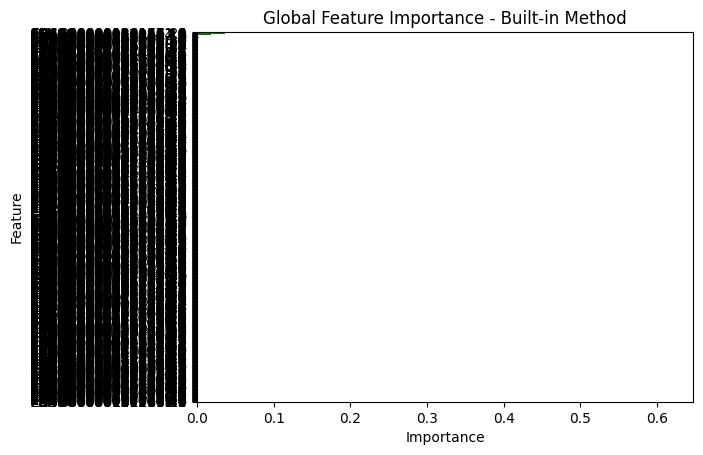

In [ ]:
most_important.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [ ]:
for i in most_important.index:
  print(i, i in most_expressed)

ENSG00000131233.10 True
ENSG00000105011.9 True
ENSG00000131914.11 True
ENSG00000284461.2 True
ENSG00000203663.4 True
ENSG00000118137.10 True
ENSG00000166069.13 True
ENSG00000064042.18 True
ENSG00000171116.7 True
ENSG00000140488.16 True
ENSG00000249581.2 True
ENSG00000179776.19 True
ENSG00000162728.5 True
ENSG00000122859.5 True
ENSG00000162761.14 True
ENSG00000120471.15 True
ENSG00000187323.12 True
ENSG00000127129.10 True
ENSG00000174990.8 True
ENSG00000164694.17 True
ENSG00000134873.10 True
ENSG00000205929.11 True
ENSG00000167619.13 True
ENSG00000165349.12 True
ENSG00000164199.18 True
ENSG00000204962.6 True
ENSG00000166105.16 True
ENSG00000126778.12 True
ENSG00000168828.5 True
ENSG00000230054.3 True
ENSG00000204889.10 True
ENSG00000007372.24 True
ENSG00000091138.13 True
ENSG00000188322.8 True
ENSG00000165509.13 True
ENSG00000182333.15 True
ENSG00000181649.8 True
ENSG00000138653.10 True
ENSG00000257008.6 True
ENSG00000149742.10 True
ENSG00000148156.8 True
ENSG00000205143.3 True
ENSG0000

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

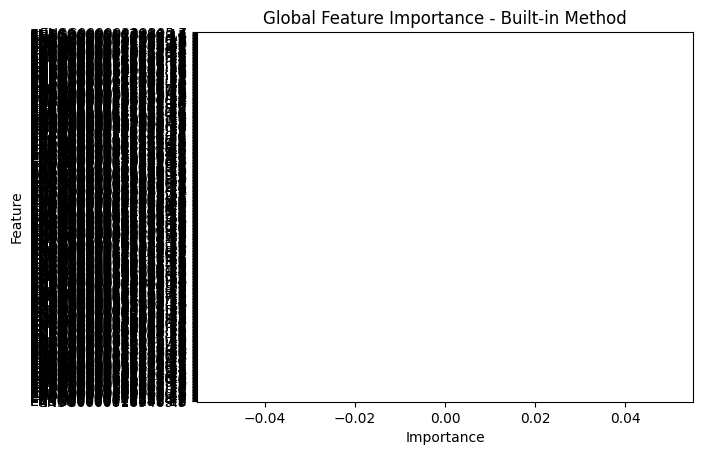

In [ ]:
less_important.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [ ]:
for i in less_important.index:
  print(i, i in least_expressed)

ENSG00000169469.9 False
ENSG00000113141.18 True
ENSG00000116199.12 True
ENSG00000105954.2 True
ENSG00000082516.9 True
ENSG00000129219.14 True
ENSG00000113119.13 True
ENSG00000169598.17 True
ENSG00000168395.16 True
ENSG00000119616.11 True
ENSG00000133704.10 True
ENSG00000003056.8 True
ENSG00000174574.16 True
ENSG00000070047.13 True
ENSG00000100030.15 True
ENSG00000167110.18 True
ENSG00000160799.11 True
ENSG00000162623.16 True
ENSG00000135365.16 True
ENSG00000119650.13 True
ENSG00000027001.10 True
ENSG00000168397.17 True
ENSG00000163001.12 True
ENSG00000100129.18 True
ENSG00000130749.10 True
ENSG00000127022.15 True
ENSG00000154222.15 True
ENSG00000112079.9 True
ENSG00000109787.13 True
ENSG00000055211.14 True
ENSG00000138138.13 True
ENSG00000276076.4 True
ENSG00000176547.10 True
ENSG00000103194.16 True
ENSG00000182318.6 True
ENSG00000101473.17 True
ENSG00000165806.21 True
ENSG00000284704.1 True
ENSG00000105887.11 True
ENSG00000137764.20 True
ENSG00000107362.14 True
ENSG00000111361.13 True

In [ ]:
most_expressed

array(['ENSG00000169469.9', 'ENSG00000170373.8', 'ENSG00000168530.16',
       ..., 'ENSG00000135318.12', 'ENSG00000203722.8',
       'ENSG00000105193.9'], dtype=object)

#PERMUTATION INVARIANCE

In [ ]:
from sklearn.inspection import permutation_importance

#rf = RandomForestRegressor(n_estimators=100, random_state=42)
#rf.fit(X_train, y_train)

result = permutation_importance(rf, X_test, y_test, n_repeats=1, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test.columns

d = pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)
d

,Importance,Std
ENSG00000285283.1,-0.002213,0.0
ENSG00000054118.15,-0.001938,0.0
ENSG00000233917.9,-0.000734,0.0
ENSG00000256966.6,-0.000398,0.0
ENSG00000135569.4,-0.000388,0.0
...,...,...
ENSG00000284772.1,0.011879,0.0
ENSG00000226685.4,0.013803,0.0
ENSG00000288643.1,0.016658,0.0
ENSG00000142751.15,0.021217,0.0


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

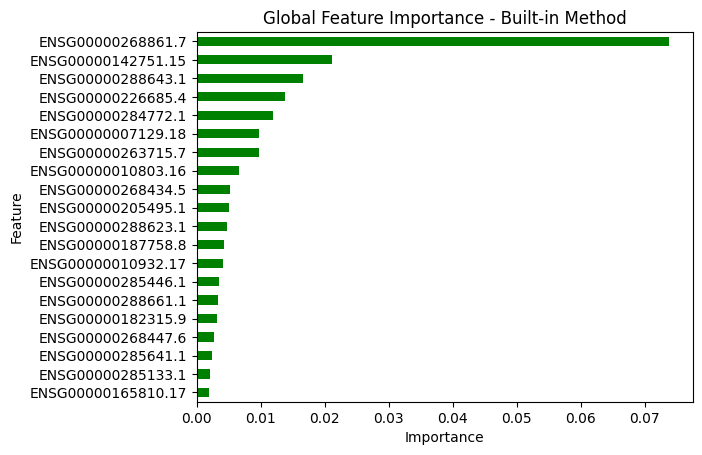

In [ ]:
most_important = d.iloc[-20:, :]
most_important['Importance'].plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [ ]:
for i in most_important.index:
  print(i, i in most_expressed)

ENSG00000165810.17 True
ENSG00000285133.1 False
ENSG00000285641.1 False
ENSG00000268447.6 False
ENSG00000182315.9 False
ENSG00000288661.1 False
ENSG00000285446.1 False
ENSG00000010932.17 True
ENSG00000187758.8 True
ENSG00000288623.1 False
ENSG00000205495.1 False
ENSG00000268434.5 False
ENSG00000010803.16 False
ENSG00000263715.7 False
ENSG00000007129.18 True
ENSG00000284772.1 False
ENSG00000226685.4 False
ENSG00000288643.1 False
ENSG00000142751.15 False
ENSG00000268861.7 False
